# Continuous Time SIR Simulations

In [2]:
import numpy as np

def Gillespie_SIR_model(
    S_IC,
    I_IC,
    R_IC,
    beta,
    gamma,
    tmax=float("inf"),
    rng=None
):
    """
    Simulate the SIR model using the Gillespie algorithm.

    Arguments:
    S_IC -- initial susceptible population
    I_IC -- initial infected population
    R_IC -- initial recovered population (not R_0)
    beta -- transmission rate
    gamma -- recovery rate
    tmax -- maximum time to simulate.
    rng -- optional random number generator. If None, a default
           random number generator will be used.


    Returns:
    t -- np array
            time points
    S -- np array
            susceptible population over time
    Inf -- np array
            infected population over time
    R -- np array
            recovered population over time

    """

    tstart = 0
    if rng is None:
        rng = np.random.default_rng()

    # Initialize populations and time
    N = S_IC + I_IC + R_IC
    S = [S_IC]
    Inf = [I_IC]
    R = [R_IC]
    t = [tstart]

    while t[-1] < tmax and Inf[-1] > 0:
        rec_rate = gamma * Inf[-1]
        inf_rate = beta * S[-1] * Inf[-1] / N
        total_rate = rec_rate + inf_rate

        delay = rng.exponential(1 / total_rate)

        time = t[-1] + delay
        if time > tmax:
            t.append(tmax)
            S.append(S[-1])
            Inf.append(Inf[-1])
            R.append(R[-1])
            # If there are still infected individuals at tmax, we truncate the simulation and record their data.
            break
        else:
            t.append(time)
            if rng.random() < inf_rate / total_rate:
                # Infection event
                S.append(S[-1] - 1)
                Inf.append(Inf[-1] + 1)
                R.append(R[-1])
            else:
                # Recovery event
                S.append(S[-1])
                Inf.append(Inf[-1] - 1)
                R.append(R[-1] + 1)

    return np.array(t), np.array(S), np.array(Inf), np.array(R)

def Gillespie_SIS_model(
    S_IC,
    I_IC,
    R_IC,
    beta,
    gamma,
    tmax=float("inf"),
    rng=None
):
    """
    Simulate the SIR model using the Gillespie algorithm.

    Arguments:
    S_IC -- initial susceptible population
    I_IC -- initial infected population
    R_IC -- initial recovered population (not R_0)
    beta -- transmission rate
    gamma -- recovery rate
    tmax -- maximum time to simulate.
    rng -- optional random number generator. If None, a default
           random number generator will be used.


    Returns:
    t -- np array
            time points
    S -- np array
            susceptible population over time
    Inf -- np array
            infected population over time
    R -- np array
            recovered population over time

    """

    tstart = 0
    if rng is None:
        rng = np.random.default_rng()

    # Initialize populations and time
    N = S_IC + I_IC + R_IC
    S = [S_IC]
    Inf = [I_IC]
    R = [R_IC]
    t = [tstart]

    while t[-1] < tmax and Inf[-1] > 0:
        rec_rate = gamma * Inf[-1]
        inf_rate = beta * S[-1] * Inf[-1] / N
        total_rate = rec_rate + inf_rate

        delay = rng.exponential(1 / total_rate)

        time = t[-1] + delay
        if time > tmax:
            t.append(tmax)
            S.append(S[-1])
            Inf.append(Inf[-1])
            R.append(R[-1])
            # If there are still infected individuals at tmax, we truncate the simulation and record their data.
            break
        else:
            t.append(time)
            if rng.random() < inf_rate / total_rate:
                # Infection event
                S.append(S[-1] - 1)
                Inf.append(Inf[-1] + 1)
                R.append(R[-1])
            else:
                # Recovery event
                S.append(S[-1]+1)
                Inf.append(Inf[-1] - 1)
                R.append(R[-1])

    return np.array(t), np.array(S), np.array(Inf), np.array(R)



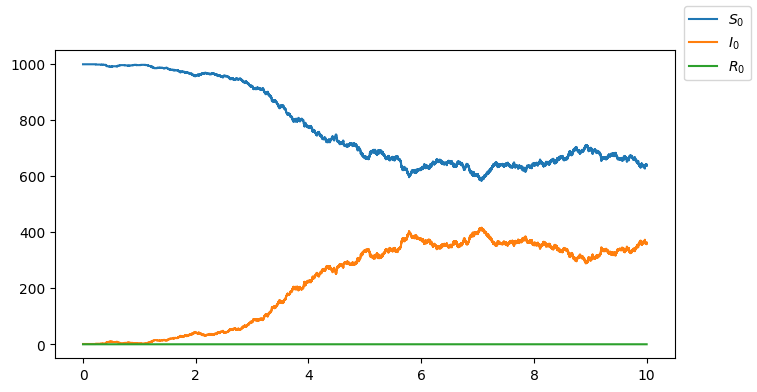

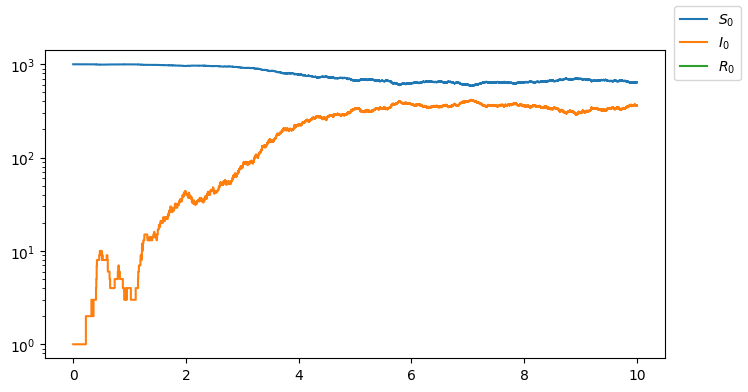

In [48]:
import matplotlib.pyplot as plt
import numpy as np

def simulate_and_plot_SIS_dynamics(N, R0=0.9, gammas=(3,), numsims = 3):
    
    fig1 = plt.figure(figsize = (8,4))
    ax1 =plt.gca()
    fig2 = plt.figure(figsize = (8,4))
    ax2 =   plt.gca()
    for gamma in gammas:
        beta = R0 * gamma
        I0 = 1
        for ctr in range(numsims):
            t, S, I, R = Gillespie_SIS_model(N-I0, I0, 0, beta, gamma, tmax = 10)
            ax1.step(t, S, label='$S_{}$'.format(ctr), where = 'post')
            ax1.step(t, I, label='$I_{}$'.format(ctr), where = 'post')
            ax1.step(t, R, label='$R_{}$'.format(ctr), where = 'post')

            ax2.step(t, S, label='$S_{}$'.format(ctr), where = 'post')
            ax2.step(t, I, label='$I_{}$'.format(ctr), where = 'post')
            ax2.step(t, R, label='$R_{}$'.format(ctr), where = 'post')
    fig1.legend()
    ax2.set_yscale('log')
    fig2.legend()
    plt.show()

simulate_and_plot_SIS_dynamics(1000, R0=1.5, gammas=(3,), numsims = 1)

NameError: name 'Gillespie_SIR_model' is not defined

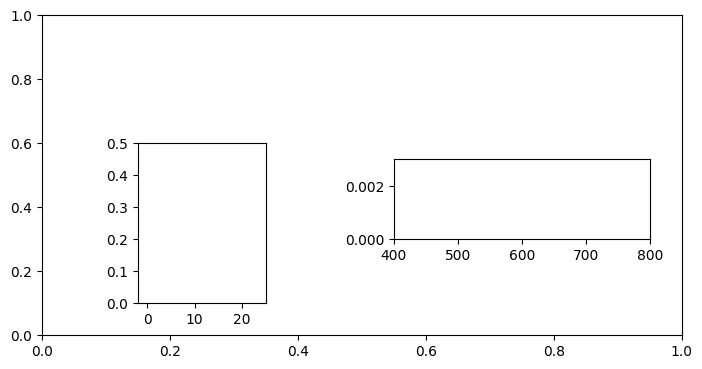

In [1]:
import matplotlib.pyplot as plt
import numpy as np
def simulate_and_plot_SIR_final_size(N, R0=1.5, gammas=(3,), numsims = 10000, xlim1 = (-2,25), xlim2 = (400,800), ylim1=(0,0.5), ylim2 = (0,0.003)):

    fig = plt.figure(figsize = (8,4))
    mainax = fig.add_axes([0.1,0.1,0.8,0.8])
    inset_ax1 = mainax.inset_axes([0.15,0.1,0.2,0.5], xlim=xlim1, ylim=ylim1)
    inset_ax2 = mainax.inset_axes([0.55,0.3,0.4,0.25], xlim=xlim2, ylim=ylim2)

    for gamma in gammas:
        beta = R0 * gamma
        I0 = 1
        final_sizes = []
        for _ in range(numsims):
            t, S, I, R = Gillespie_SIR_model(N-I0, I0, 0, beta, gamma)
            final_sizes.append(R[-1])
        final_sizes = np.array(final_sizes)
        mainax.hist(final_sizes, bins=-0.5+np.arange(N+1), density=True, alpha=0.5, label=f'Probability: $\\beta={beta}, \\gamma={gamma}$')
        mainax.hist(final_sizes, bins=-0.5+np.arange(N+1), density=True, cumulative=True, alpha=0.5, histtype='step')
        inset_ax2.hist(final_sizes, bins = -0.5+np.arange(N+1), density=True, alpha=0.5, label=f'$\\beta={beta}, \\gamma={gamma}$')
        inset_ax1.hist(final_sizes, bins = -0.5+np.arange(N+1), density=True, alpha=0.5, label=f'$\\beta={beta}, \\gamma={gamma}$')


        #modifying cumulative dist plot followinghttps://stackoverflow.com/a/50711003/2966723
        poly = mainax.findobj(plt.Polygon)[-1] 
        vertices = poly.get_path().vertices

        # Keep everything above y == 0. You can define this mask however
        # you need, if you want to be more careful in your selection.
        keep = vertices[:, 1] > 0

        # Construct new polygon from these "good" vertices
        new_poly = plt.Polygon(vertices[keep], closed=False, fill=False,
                               edgecolor=poly.get_edgecolor(),
                               linewidth=poly.get_linewidth(), 
                               label = f'Cumulative Distribution: $\\beta={beta}, \\gamma={gamma}$')
        poly.set_visible(False)
        mainax.add_artist(new_poly)
        plt.draw()
    mainax.indicate_inset_zoom(inset_ax1)
    mainax.indicate_inset_zoom(inset_ax2)
    plt.xlabel('Total Number Infected')
    plt.ylabel('Probability')
    plt.legend(loc='upper left', fontsize=8)
    plt.title('$N={}$'.format(N))

simulate_and_plot_SIR_final_size(1000, numsims = 10000)
simulate_and_plot_SIR_final_size(10000, numsims = 1000, xlim2=(5000,6500), ylim2=(0,0.002))
